### Importing the Modules 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

### Reading & Understanding the Dataset 

In [2]:
# importing the dataset
df = pd.read_csv(r'day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# to check all the column names that are present in the dataset
df.columns 

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
# to check the number of rows and columns in the dataset.
df.shape  

(730, 16)

In [5]:
 # to check the datatype information of columns. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# to check the statistical information of the numberical columns. 
df.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Inference: On an average the Bike was subscribed 4508 times on the daily basis. The least count it was subscribed on a particular day is 22 and the maximum count it was subscibed on a particular day is 8714 times.

In [7]:
df.apply(lambda x: len(x.unique())) # to display the unique values 

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

##### Overall Inference from the dataset:

- So from the above information it can be inferred that Season, Year, Month, Holiday, Weekday and Weathersit are 'Categorical variables'.
- Year, Holiday and Workingday are 'Binary Categorical Variables'.
- Humidity and Windspeed are 'Continuous Variables'.
- Count is our 'Target Variable'.

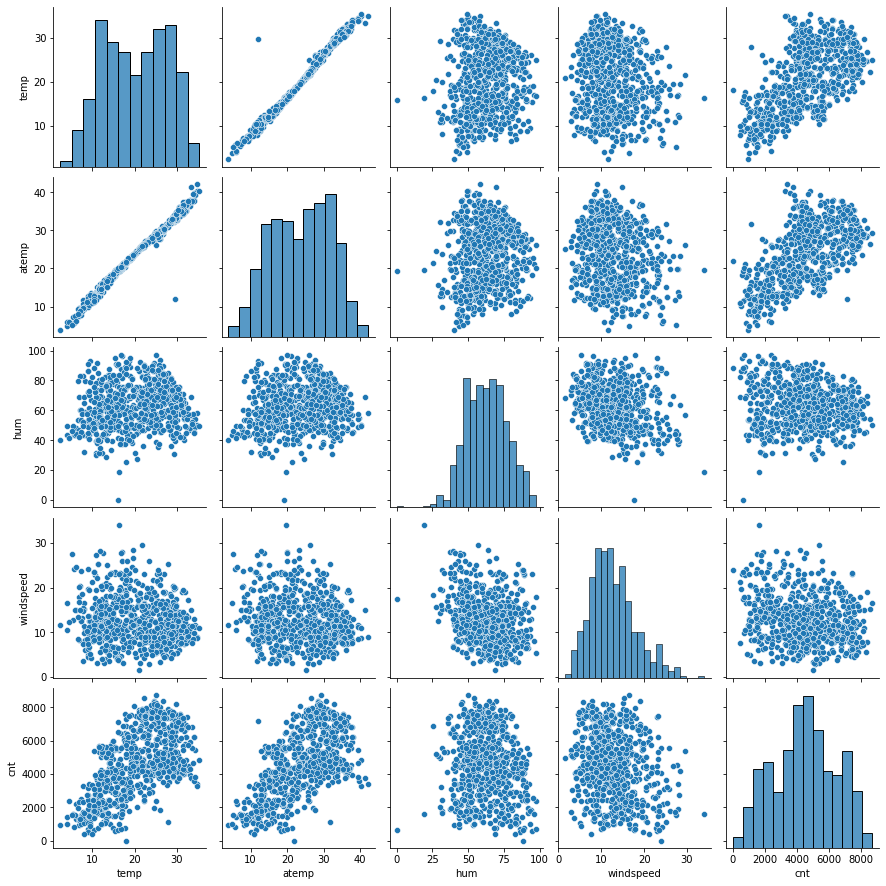

In [8]:
# Pairplots for numberic variables

sns.pairplot(df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

##### We see there is a strong correlation between temp & atemp as we can see a linear curve between the 2 (adjusted temperature) so let us verify this using Heatmap Plot.

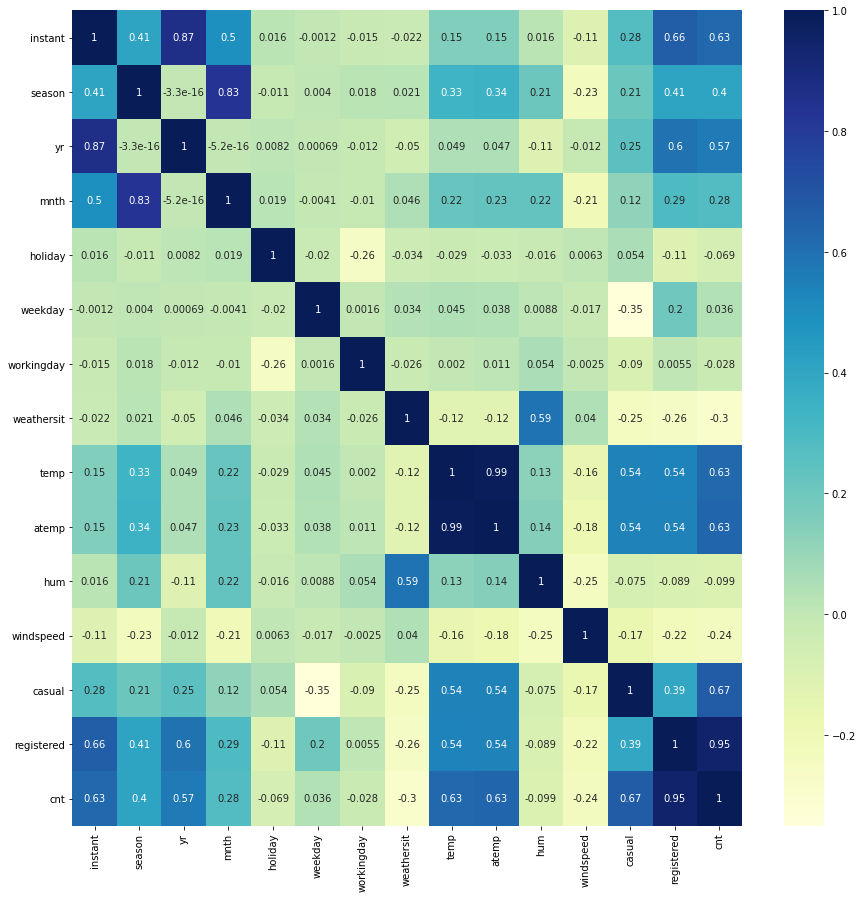

In [9]:
# visualising the correlation between the variable before dropping them. 

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

##### 1. We see that `temp` and `atemp` have coefficient `0.99` which means we'll have to drop one of them as they are highly correlated. 
##### 2. `Registered` and `cnt` have coefficient `0.95` which is quite high so we'll drop `registered` as it can be described by the latter.
##### 3. We also notice the fact that `casual` and `cnt` have `0.67` coeff. which is significantly high to drop since `cnt` is a sum of `registered` and `casual` hence highly correlated. 


In [10]:
# checking for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inference : We see there are no null values present in our dataset so we don't have to handle them.

In [11]:
# renaming the columns to the corresponding meaningful name for the ease of our understanding.

df = df.rename(columns ={"weathersit":"weather",
                        "yr":"year",
                        "mnth":"month",
                        "hum":"humidity",
                        "cnt":"count"})
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df = df.drop(columns = ['instant','dteday','casual','registered','atemp'])
df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


#####  We have dropped column as-

- Instant is an index and serves no purpose.
- Date (dteday) is being referred by Year and Month so they are correlated. 
- Adjusted Temperature (atemp) is based on Temperature (temp) variable hence correlated and can be explained by Temp.
- Count (target variable) is basically the sum of Casual users and Registered users which are correlated and explained by our target variable, Count. 

In [13]:
# changing the int columns to category 
cols = ['season','month','holiday','workingday','weather']

for i in cols:
    df[i] = df[i].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   humidity    730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  count       730 non-null    int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 38.9 KB


In [14]:
# Mapping the categoriacl variables - Season, Weather & Weekday with their respective values.

df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)


df['weather'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)


df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

df.head(10)



,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,Clear_Few Clouds,8.378268,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist_cloudy,8.057402,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist_cloudy,6.765000,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,Clear_Few Clouds,5.671653,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,Clear_Few Clouds,6.184153,48.2917,14.958889,1321


In [15]:
#changing datatypes of numerical columns to appropriate types

df[['temp','humidity','windspeed','count']]=df[['temp','humidity','windspeed','count']].apply(pd.to_numeric)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    category
 6   weather     730 non-null    object  
 7   temp        730 non-null    float64 
 8   humidity    730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  count       730 non-null    int64   
dtypes: category(3), float64(3), int64(2), object(3)
memory usage: 48.5+ KB


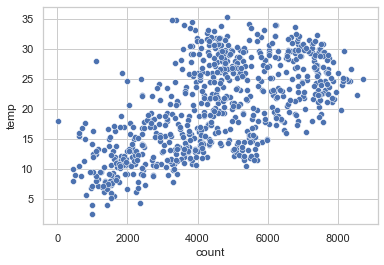

In [16]:
# visualising the impact of temperature on the target variable - count

sns.set(style='whitegrid')
sns.scatterplot( y='temp', x='count', data = df)
plt.show()

##### Temperature and Count shows a linear relationship, as the temperature increases the count of bike also increases linearly. 

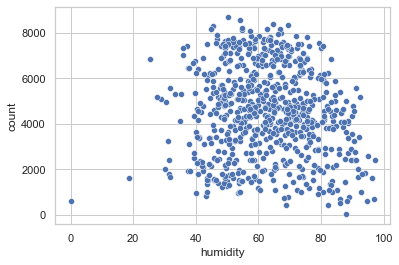

In [17]:
# visualising the impact of humidity on the target variable - count

sns.set(style='whitegrid')
sns.scatterplot( x= 'humidity', y = 'count',data = df)
plt.show()

##### Humidity doesn't seem to have much impact  alone  on the target variable- Count. There's no pattern visible hence no relation can be established between the two variables.

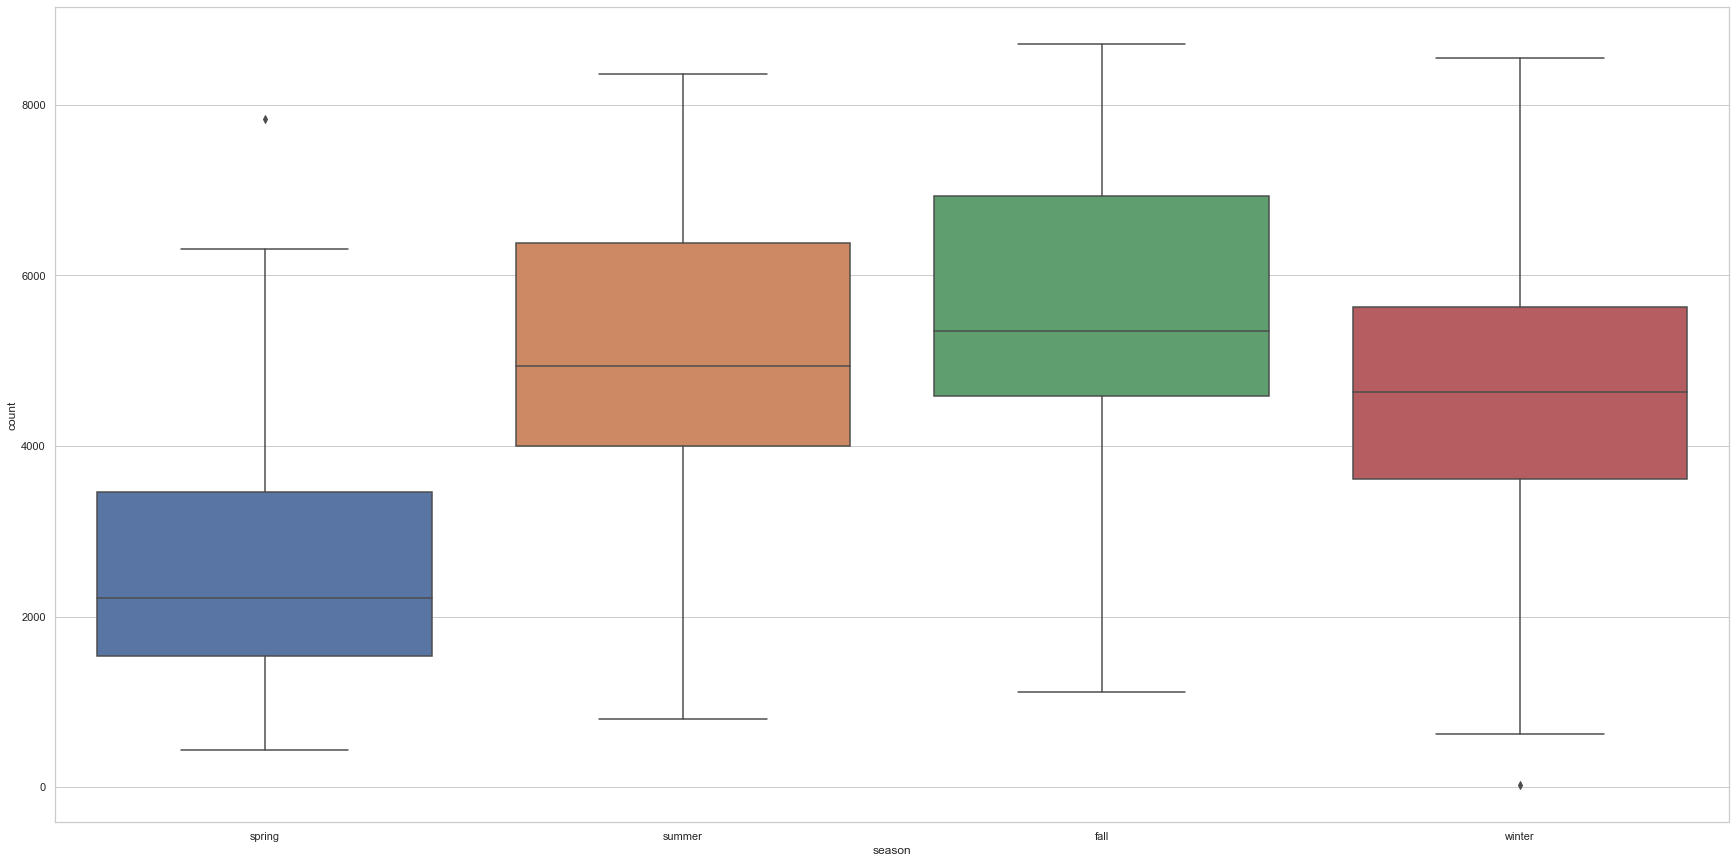

In [18]:
# visualising the impact of season on the target variable - count

plt.figure(figsize=(30, 15))
sns.boxplot(x = 'season', y = 'count', data = df)
plt.show()

##### From above boxplot we can infer that:

- Fall season is best season in terms of business as count for bike users is the highest in fall.
- Spring season on the other hand has the lowest count for bike users

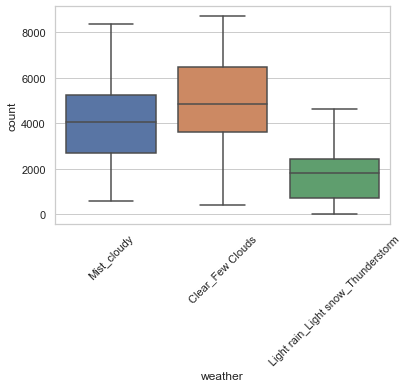

In [19]:
# visualising the impact of the weather on the target variable - count

sns.boxplot(x = 'weather', y = 'count', data = df)
plt.xticks(rotation=45)
plt.show()

##### From above boxplot we can infer that:
- When the weather is clear the count for total bike users increases.
- And when there's Light rain and snow the count for bike users decreses which is pretty intuitive as well.

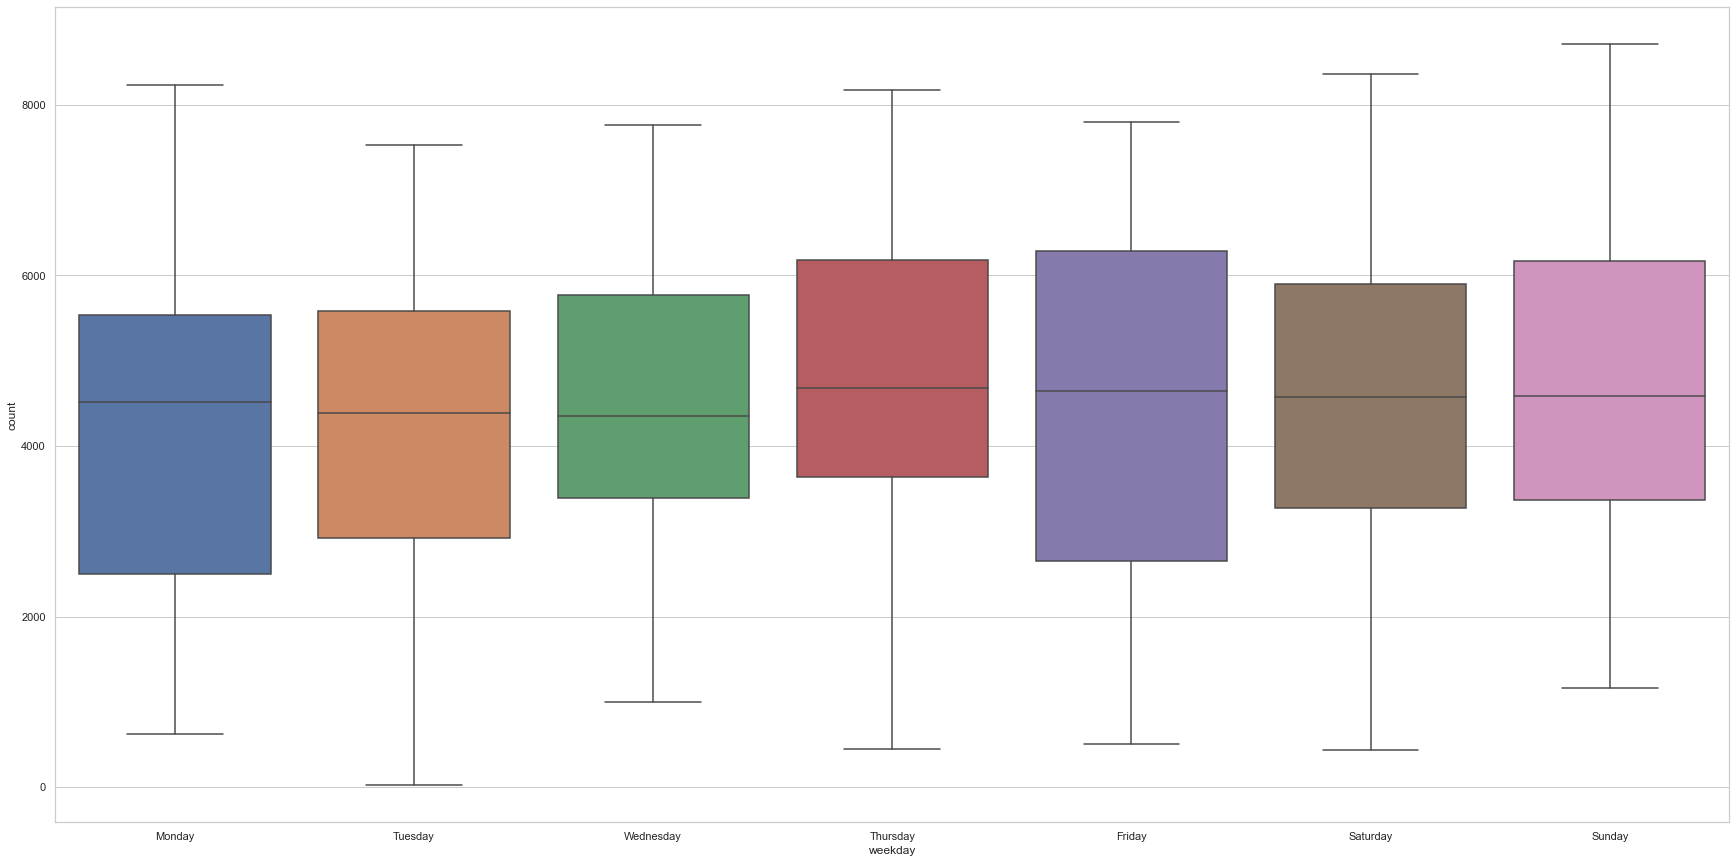

In [20]:
# visualising the impact of day of the week on the target variable - count

plt.figure(figsize=(30, 15))
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.show()

##### From the above plot we can infer that: 
1. Median value is approximately same for all the days which is above 4000 which tells us that on all 7 days in a week the bike was on an average subscribed to more than 4000 times.
2. Sunday records the highest count of Bike subscribers and on the Contrary Tuesday records the lowest count. 

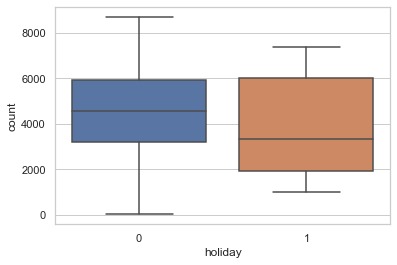

In [21]:
# visualising the impact of holidays on the target variable - count

sns.boxplot(x = 'holiday', y = 'count', data = df)
plt.show()

##### Inference : We can infer that on the Working Day bike was on an average subscribed  more than 4000 times compared to a Holiday when it was subscribed to approximately 3000 times. The maximum times it was subscribed also happens to be a Weekday and the max. times it was subscribed on a Holiday is slightly more than 7000 times.

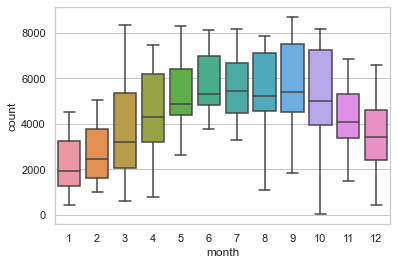

In [22]:
# visualising the impact of month of the year on the target variable,

sns.boxplot(data = df, x = 'month', y ='count')
plt.show()

##### Inference : It can be seen that bike was subscribed more during the month of September specifically between August to October so he makes sense that season - Fall had more subscribers for the Bikes.


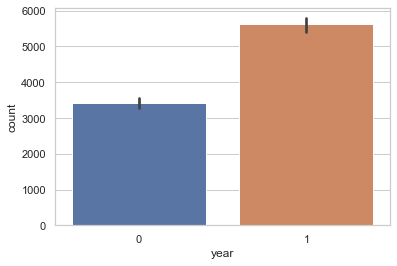

In [23]:
sns.barplot(data = df, x= 'year', y = 'count')
plt.show()

##### Inference : From the above bar plot it can be clearly inferred that the Bike was subscribed more in the year 2019 compared to 2018 hence there was a significant increase in the Bike Sharing business. 

In [24]:
# Creating Dummy Variables for Categorical Variable to have numerical represenation of them. 

Season_Type = pd.get_dummies(df['season'],drop_first=True)
Weather_Condition =pd.get_dummies(df['weather'],drop_first=True)
Day_of_week = pd.get_dummies(df['weekday'],drop_first=True)
Month = pd.get_dummies(df['month'],drop_first=True)

In [25]:
# Merging the Dummy Variables created with the Main Dataset. 

df=pd.concat([df,Season_Type],axis=1)
df=pd.concat([df,Weather_Condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   season                              730 non-null    object  
 1   year                                730 non-null    int64   
 2   month                               730 non-null    category
 3   holiday                             730 non-null    category
 4   weekday                             730 non-null    object  
 5   workingday                          730 non-null    category
 6   weather                             730 non-null    object  
 7   temp                                730 non-null    float64 
 8   humidity                            730 non-null    float64 
 9   windspeed                           730 non-null    float64 
 10  count                               730 non-null    int64   
 11  spring                          

In [26]:
#Deleting the orginal columns season, weather, weekday and month.

df.drop(['season'],axis=1,inplace=True)
df.drop(['weather'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['month'],axis=1,inplace=True)

In [27]:
df.head(10)

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,8.378268,51.8261,6.000868,1606,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,8.057402,49.8696,11.304642,1510,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,6.765000,53.5833,17.875868,959,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,5.671653,43.4167,24.250650,822,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.columns

Index([                              'year',
                                  'holiday',
                               'workingday',
                                     'temp',
                                 'humidity',
                                'windspeed',
                                    'count',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [29]:
df.shape # We see there are 29 columns after creating dummy variables.

(730, 29)

In [30]:
df.apply(lambda x: len(x.unique())) # to display the unique values for scaling them. 

year                                    2
holiday                                 2
workingday                              2
temp                                  498
humidity                              594
windspeed                             649
count                                 695
spring                                  2
summer                                  2
winter                                  2
Light rain_Light snow_Thunderstorm      2
Mist_cloudy                             2
Monday                                  2
Saturday                                2
Sunday                                  2
Thursday                                2
Tuesday                                 2
Wednesday                               2
2                                       2
3                                       2
4                                       2
5                                       2
6                                       2
7                                 

### Splitting the data into Train & Test

In [31]:
# importing the required modules

import sklearn 
from sklearn.model_selection import train_test_split #
from sklearn.preprocessing import MinMaxScaler # for scaling the numerical variables.


In [32]:
np.random.seed(0) # specifying this so that the train and test data set always have the same rows, respectively
df_train , df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [33]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
scaler = MinMaxScaler() # instantiating the object.
num_vars = ['temp','humidity','windspeed','count'] # creating list of variables to re-scale them for better interpretability.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) # fitting on the data
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [35]:
df_train.describe() # checking all the re-scaled values. 

,year,temp,humidity,windspeed,count,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# creating X & Y
y_train = df_train.pop('count') # storing target variable (depedent) - count 
X_train = df_train # storing independent variables

In [37]:
X_train.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
y_train.head()


653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

### Data Modelling & Evaluation

##### Here we are using RFE (Recursive Feature Elilmination) Method for feature selection and will start with 15 Variables & will use mixed approach to build the model.

In [39]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)


In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 13),
 (2, False, 9),
 (3, True, 1),
 (4, False, 2),
 (5, True, 1),
 (6, False, 3),
 (7, False, 10),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 11),
 (12, False, 12)]

In [42]:
cols = X_train.columns[rfe.support_] #keeping all the values for which RFE Support is True in X_train dataset. 
cols

Index([                              'year',
                                  'holiday',
                                     'temp',
                                 'humidity',
                                'windspeed',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_] # dropping all the values for which RFE Support Value is False from the X_train dataset. 

Index(['workingday',     'Monday',   'Saturday',     'Sunday',   'Thursday',
          'Tuesday',  'Wednesday',            2,            4,            6,
                  7,           11,           12],
      dtype='object')

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [45]:
X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,8,9,10
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,1
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0


In [46]:
X_train.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [48]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.95e-189
Time:                        23:38:56   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

##### `5-May` is insignificant to us as its `P-Value` > 0.05 (Significance Value), hence eliminating it from the 'X_train_rfe' dataset.

In [50]:
# Dropping Column 5 which stands for May Month.

X_train_rfe = X_train_rfe.drop([5], axis=1)

In [51]:
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,8,9,10
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,1,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0


In [52]:
#Rebuilding the model without `5:May-Month`
# Adding a constant variable

import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)
     

In [53]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model

In [54]:
# summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          9.02e-190
Time:                        23:38:56   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#####  `Spring` is insignificant as its P-Value is > 0.05, hence dropping it. 

In [55]:
# Dropping Column Spring.

X_train_rfe = X_train_rfe.drop(['spring'], axis=1)

In [56]:
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,8,9,10
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,1,1,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0


In [57]:
#Rebuilding the model without `5:May-Month`
# Adding a constant variable

import statsmodels.api as sm
X_train_rfe2 = sm.add_constant(X_train_rfe)
     

In [58]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model

In [59]:
# summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.26e-190
Time:                        23:38:56   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#####  `3-March` is insignificant as its P-Value is > 0.05, hence dropping it. 

In [60]:
# Dropping Column 3 which stands for March.

X_train_rfe = X_train_rfe.drop([3], axis=1)

In [61]:
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,8,9,10
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,1
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0


In [62]:
#Rebuilding the model without `3:March-Month`
# Adding a constant variable

import statsmodels.api as sm
X_train_rfe3 = sm.add_constant(X_train_rfe)

In [63]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model

In [64]:
# summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          6.02e-191
Time:                        23:38:56   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [65]:
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,8,9,10
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,1
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0


In [66]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [67]:
X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,8,9,10
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,1
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0


In [68]:
# Now calculating VIFs for the model

# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,humidity,14.41
2,temp,9.88
4,windspeed,3.59
6,winter,2.27
8,Mist_cloudy,2.13
0,year,2.02
5,summer,1.83
11,10,1.61
9,8,1.60
10,9,1.34


##### `humidity` has `VIF` > 5, hence dropping it.

In [69]:
X_train_rfe = X_train_rfe.drop(['humidity'], axis=1)

In [70]:
X_train_rfe.head()

,year,holiday,temp,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,8,9,10
653,1,0,0.509887,0.300794,0,1,0,0,0,0,1
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,0,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,1,0,0,0


In [71]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe4 = sm.add_constant(X_train_rfe3)

In [72]:
lm4 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model

In [73]:
# summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          6.02e-191
Time:                        23:38:56   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

##### `10-October` has P-Value > 0.05, hence dropping it.

In [74]:
X_train_rfe = X_train_rfe.drop([10], axis=1)

In [75]:
X_train_rfe.head()

,year,holiday,temp,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,8,9
653,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,1,0,0


In [76]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe5 = sm.add_constant(X_train_rfe)

In [77]:
lm5 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model

In [78]:
# summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.26e-187
Time:                        23:38:56   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [79]:
# Now calculating VIFs for the model

# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,year,2.00
4,summer,1.81
8,8,1.58
5,winter,1.49
7,Mist_cloudy,1.48
9,9,1.31
6,Light rain_Light snow_Thunderstorm,1.08
1,holiday,1.04


### Residual Analysis

###### To check if the error terms are Normally Distributed which is one of the 5 Assumptions of Linear Regression, plotting the Histogram to see their distribution.

In [80]:
y_train_count = lm5.predict(X_train_rfe5)

In [81]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
# calculating residuals

residual = y_train - y_train_count

Text(0.5, 0, 'Errors')

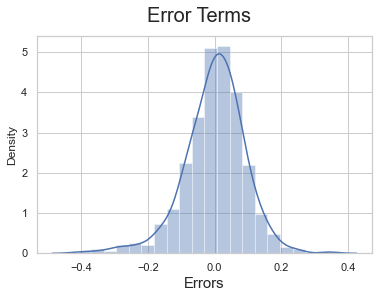

In [83]:
# Checking the assumption of normality
# ploting the histogram of the error terms 

fig = plt.figure()
sns.distplot((residual), bins=20)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel("Errors", fontsize = 15)

##### Inference : We can see clearly that Error Terms are Normally Distributed.

In [84]:
# There is No Multicollinearity between the predictor variables

vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,year,2.00
4,summer,1.81
8,8,1.58
5,winter,1.49
7,Mist_cloudy,1.48
9,9,1.31
6,Light rain_Light snow_Thunderstorm,1.08
1,holiday,1.04


##### From the VIF calculation we can say that there is no presence of Multicollinearity between the predictor variables as VIF is within the acceptable range for all variables i.e. below 5 except for Temp which is critical to our findings.

In [85]:
# Now for test data 
#Scaling the test data

num_vars = ['temp','humidity','windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars]) 

In [86]:
df_test.describe()

,year,temp,humidity,windspeed,count,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
# Creating X and y sets

y_test = df_test.pop('count')
X_test = df_test

In [88]:
X_train_new = X_train_rfe5.drop(['const'], axis = 1)

In [89]:
X_train_new.head()

,year,holiday,temp,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,8,9
653,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,1,0,0


In [90]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_new)

In [91]:
X_test_sm.columns 

Index([                             'const',
                                     'year',
                                  'holiday',
                                     'temp',
                                'windspeed',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          8,
                                          9],
      dtype='object')

In [92]:
# Making Predictions on the chosen model

y_pred = lm5.predict(X_test_sm)

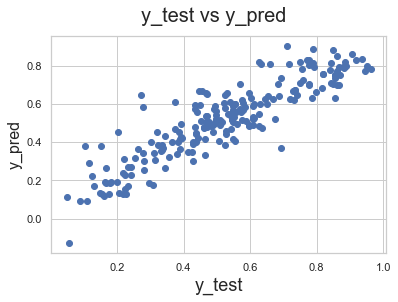

In [93]:
#CHECKING PREDICTED V/s TEST DATA

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

##### We have a model that seems good enough to predict demand of bikes as the actual and the predicted cnt significantly overlapped, thus indicating that the model is able to explain the change in demand very well.¶

In [94]:
# Calculating the r square for the test data

from sklearn.metrics import r2_score  # importing the r2_score from sklearn.metrics

r_squared = r2_score(y_test,y_pred)
r_squared

0.7931434526028904

In [95]:
X_test_new.shape

(219, 10)

In [96]:
# n is number of rows in X

n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

In [97]:
# Now calculating Adjusted R-Square for the test data
# using Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

Adj_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
Adj_r2

0.7831984262857217

##### Final Result Comparison

- Train R^2 : 0.834
- Train Adjusted R^2 :0.831
- Test R^2 :0.7931
- Test Adjusted R^2 :0.7831



##### This seems to be a really good model that can very well 'Generalize' various datasets. As the difference between `Trained Adjusted R^2` and `Test Adjusted R^2` is very less we can say that, what the model has learned on the training set, it is also able to generalize very well on the test set.

### Reporting the Final Model

In [98]:
# final model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.26e-187
Time:                        23:38:58   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

We can see that the equation of our best fitted line is:

$ count =  0.2325 \times  year -0.0971  \times  holiday +  0.5174 \times temp  -0.1497  \times windspeed + 0.1000 \times summer + 0.1383 \times winter + 0.0542 \times August(8) + 0.1162 \times September(9) -0.2770 \times Light rain_Light snow_Thunderstorm  -0.0825  \times Mist_cloudy $

From our final model we can clearly see that the demand for Bikes mainly depends on below variables:

- year
- holiday
- temp
- windspeed
- summer
- winter
- August (8)
- September (9)
- Light rain_Light snow_Thunderstorm
- Mist_cloudy   

As per our final Model, the top 3 predictor variables that influences the bike booking are:
- `temp`-A coefficient value of '0.5174' indicates that a unit increase in `temp` variable increases the bike hire numbers by 
  '0.5174' units.
  
- `Light rain_Light snow_Thunderstorm`-A coefficient value of '-0.2828' indicates that a unit increase in `Light rain_Light snow_Thunderstorm` variable decreases the bike hire numbers by '0.2828' units
- `year`- A coefficient value of '0.2325' indicates that a unit increase in `year` variable increases the bike hire numbers by 
  '0.2325' units.

#### - By Arun Tyagi